# Crime Analysis in Chicago (2001 vs. 2018)

## Descriptive Data Analysis

### Setup

In [1]:
# Imports
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (25, 10) #increase figure size
plt.rcParams.update({'font.size': 22}) # Increase font size

In [2]:
"""
# Read in datasets
df_2001_2004 = pd.read_csv("data/Chicago_Crimes_2001_to_2004.csv", error_bad_lines=False)
df_2005_2007 = pd.read_csv("data/Chicago_Crimes_2005_to_2007.csv", error_bad_lines=False)
df_2008_2011 = pd.read_csv("data/Chicago_Crimes_2008_to_2011.csv", error_bad_lines=False)
df_2012_2017 = pd.read_csv("data/Chicago_Crimes_2012_to_2017.csv", error_bad_lines=False)

# Create dataframes per year
df_2001 = df_2001_2004[df_2001_2004['Year'] == 2001]
df_2002 = df_2001_2004[df_2001_2004['Year'] == 2002]
df_2003 = df_2001_2004[df_2001_2004['Year'] == 2003]
df_2004 = df_2001_2004[df_2001_2004['Year'] == 2004]

df_2005 = df_2005_2007[df_2005_2007['Year'] == 2005]
df_2006 = df_2005_2007[df_2005_2007['Year'] == 2006]
df_2007 = df_2005_2007[df_2005_2007['Year'] == 2007]

df_2008 = df_2008_2011[df_2008_2011['Year'] == 2008]
df_2009 = df_2008_2011[df_2008_2011['Year'] == 2009]
df_2010 = df_2008_2011[df_2008_2011['Year'] == 2010]
df_2011 = df_2008_2011[df_2008_2011['Year'] == 2011]

df_2012 = df_2012_2017[df_2012_2017['Year'] == 2012]
df_2013 = df_2012_2017[df_2012_2017['Year'] == 2013]
df_2014 = df_2012_2017[df_2012_2017['Year'] == 2014]
df_2015 = df_2012_2017[df_2012_2017['Year'] == 2015]
df_2016 = df_2012_2017[df_2012_2017['Year'] == 2016]
df_2017 = df_2012_2017[df_2012_2017['Year'] == 2017]

# List with all datasets
export_datasets = [df_2001, df_2002, df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017]

# Export dataframes into csv files per year
year = 2001
for dataset in export_datasets:
    name = "data/crime_" + str(year) + ".csv"
    cols = dataset.columns
    #df = pd.read_csv(name, )
    dataset.to_csv(name, index=False)
    #dataset.to_csv(name, index=False)
    year += 1

# Loop through csv files and resave to fix index column
year = 2001
for dataset in export_datasets:
    name = "crime_" + str(year) + ".csv"
    df = pd.read_csv("data/" + name).drop(dataset.columns[0], axis=1)
    df.to_csv("data/" + name, index=0)
    year += 1
""";

In [3]:
"""
# Load datasets from beginning, middle, and end years
df_2003 = pd.read_csv("data/crime_2003.csv")
df_2003.name = "Crime in 2003"

df_2007 = pd.read_csv("data/crime_2007.csv")
df_2007.name = "Crime in 2007"

df_2016 = pd.read_csv("data/crime_2016.csv")
df_2016.name = "Crime in 2016"

datasets = [df_2003, df_2007, df_2016]
"""

# Load all datasets
df_2001 = pd.read_csv("data/crime_2001.csv")
df_2001.name = "Crime in 2001"
df_2001.year = "2001"

df_2002 = pd.read_csv("data/crime_2002.csv")
df_2002.name = "Crime in 2002"
df_2002.year = "2002"

df_2003 = pd.read_csv("data/crime_2003.csv")
df_2003.name = "Crime in 2003"
df_2003.year = "2003"

df_2004 = pd.read_csv("data/crime_2004.csv")
df_2004.name = "Crime in 2004"
df_2004.year = "2004"

df_2005 = pd.read_csv("data/crime_2005.csv")
df_2005.name = "Crime in 2005"
df_2005.year = "2005"

df_2006 = pd.read_csv("data/crime_2006.csv")
df_2006.name = "Crime in 2006"
df_2006.year = "2006"

df_2007 = pd.read_csv("data/crime_2007.csv")
df_2007.name = "Crime in 2007"
df_2007.year = "2007"

df_2008 = pd.read_csv("data/crime_2008.csv")
df_2008.name = "Crime in 2008"
df_2008.year = "2008"

df_2009 = pd.read_csv("data/crime_2009.csv")
df_2009.name = "Crime in 2009"
df_2009.year = "2009"

df_2010 = pd.read_csv("data/crime_2010.csv")
df_2010.name = "Crime in 2010"
df_2010.year = "2010"

df_2011 = pd.read_csv("data/crime_2011.csv")
df_2011.name = "Crime in 2011"
df_2011.year = "2011"

df_2012 = pd.read_csv("data/crime_2012.csv")
df_2012.name = "Crime in 2012"
df_2012.year = "2012"

df_2013 = pd.read_csv("data/crime_2013.csv")
df_2013.name = "Crime in 2013"
df_2013.year = "2013"

df_2014 = pd.read_csv("data/crime_2014.csv")
df_2014.name = "Crime in 2014"
df_2014.year = "2014"

df_2015 = pd.read_csv("data/crime_2015.csv")
df_2015.name = "Crime in 2015"
df_2015.year = "2015"

df_2016 = pd.read_csv("data/crime_2016.csv")
df_2016.name = "Crime in 2016"
df_2016.year = "2016"

datasets = [df_2003,
            df_2004,
            df_2005,
            df_2006,
            df_2007,
            df_2008,
            df_2009,
            df_2010,
            df_2011,
            df_2012,
            df_2013,
            df_2014,
            df_2015,
            df_2016]

/Users/prettybeach/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Size

In [4]:
for dataset in datasets:
    print("Dataset: {}, Shape: {}".format(dataset.name, dataset.shape))

Dataset: Crime in 2003, Shape: (475913, 22)
Dataset: Crime in 2004, Shape: (388205, 22)
Dataset: Crime in 2005, Shape: (455811, 22)
Dataset: Crime in 2006, Shape: (794684, 22)
Dataset: Crime in 2007, Shape: (621848, 22)
Dataset: Crime in 2008, Shape: (852053, 22)
Dataset: Crime in 2009, Shape: (783900, 22)
Dataset: Crime in 2010, Shape: (700691, 22)
Dataset: Crime in 2011, Shape: (352066, 22)
Dataset: Crime in 2012, Shape: (335670, 22)
Dataset: Crime in 2013, Shape: (306703, 22)
Dataset: Crime in 2014, Shape: (274527, 22)
Dataset: Crime in 2015, Shape: (262995, 22)
Dataset: Crime in 2016, Shape: (265462, 22)


### Missingness

In [5]:
for dataset in datasets:
    print("Dataset: {}".format(dataset.name))
    print(dataset.isnull().sum())
    print('\n')

Dataset: Crime in 2003
ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description       2
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                      19
Community Area            50
FBI Code                   0
X Coordinate            4728
Y Coordinate            4728
Year                       0
Updated On                 0
Latitude                4728
Longitude               4728
Location                4728
dtype: int64


Dataset: Crime in 2004
ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description       8
Arrest                     0
Domestic                   0
Beat       

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description      783
Arrest                      0
Domestic                    0
Beat                        0
District                    0
Ward                        0
Community Area              0
FBI Code                    0
X Coordinate            14189
Y Coordinate            14189
Year                        0
Updated On                  0
Latitude                14189
Longitude               14189
Location                14189
dtype: int64




### Remove rows with missing values

In [6]:
for dataset in datasets:
    dataset.dropna(inplace=True)

### Number of crimes per year

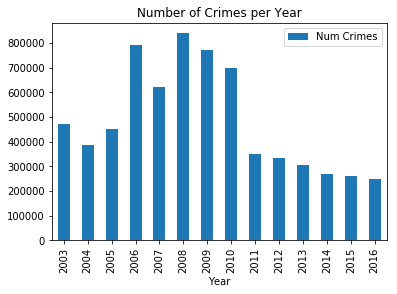

In [7]:
years = []
data_len = []
for dataset in datasets:
    years.append(dataset.year)
    data_len.append(len(dataset))

df_num = pd.DataFrame({'Year': years,'Num Crimes': data_len}).set_index('Year')
df_num.plot(kind='bar', rot=90, title="Number of Crimes per Year");

### Crime per community area (2003, 2007, 2016)

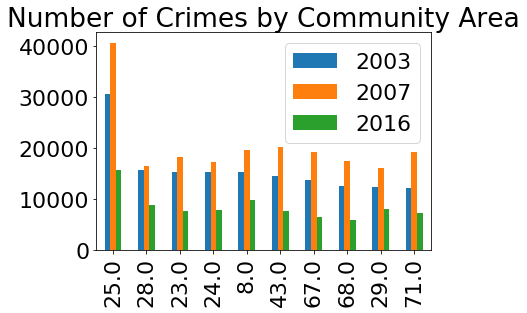

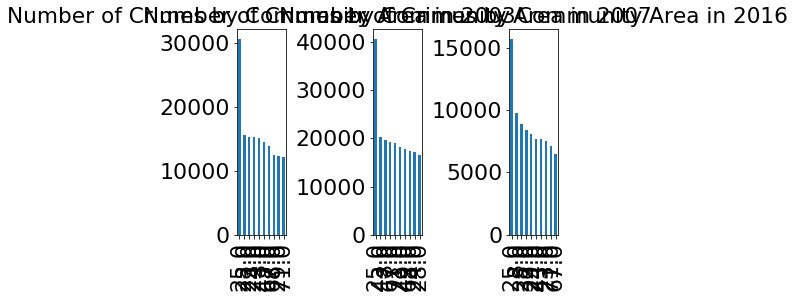

In [8]:
category = 'Community Area'
num_categories = 71

df_areas = pd.DataFrame()
df_areas['2003'] = df_2003[category].value_counts()#[:num_categories]
df_areas['2007'] = df_2007[category].value_counts()#[:num_categories]
df_areas['2016'] = df_2016[category].value_counts()#[:num_categories]

plt.rcParams.update({'font.size': 22})
df_areas.head(10).plot(kind='bar', rot=90, title="Number of Crimes by Community Area");

fig, axs = plt.subplots(1,3)
plt.tight_layout()

plt.rcParams.update({'font.size': 18}) # Increase font size

df_areas['2003'].sort_values(ascending=False).head(10).plot(kind='bar', rot=90, ax=axs[0], title="Number of Crimes by Community Area in 2003");
df_areas['2007'].sort_values(ascending=False).head(10).plot(kind='bar', rot=90, ax=axs[1], title="Number of Crimes by Community Area in 2007");
df_areas['2016'].sort_values(ascending=False).head(10).plot(kind='bar', rot=90, ax=axs[2], title="Number of Crimes by Community Area in 2016");

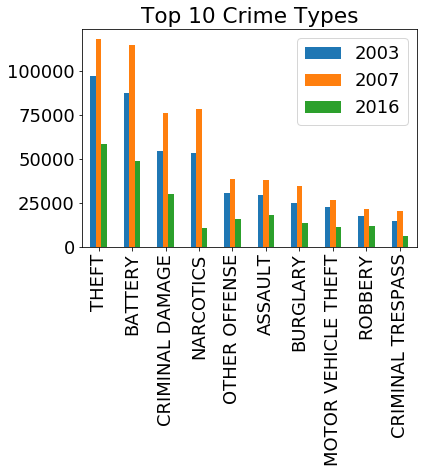

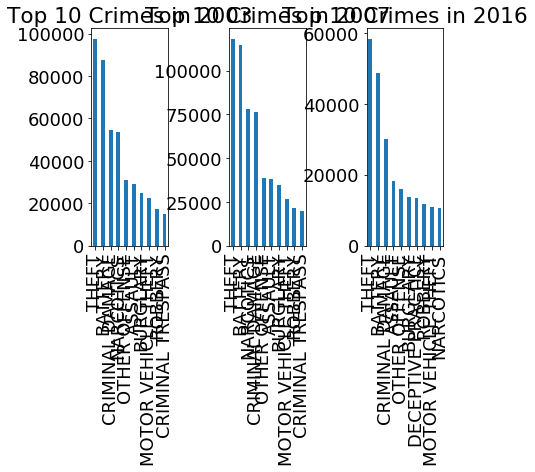

In [ ]:
#%matplotlib inline

category = 'Primary Type'
num_categories = 10

df_areas = pd.DataFrame()
df_areas['2003'] = df_2003[category].value_counts()
df_areas['2004'] = df_2004[category].value_counts()
df_areas['2005'] = df_2005[category].value_counts()
df_areas['2006'] = df_2006[category].value_counts()
df_areas['2007'] = df_2007[category].value_counts()
df_areas['2008'] = df_2008[category].value_counts()
df_areas['2009'] = df_2009[category].value_counts()
df_areas['2010'] = df_2010[category].value_counts()
df_areas['2011'] = df_2011[category].value_counts()
df_areas['2012'] = df_2012[category].value_counts()
df_areas['2013'] = df_2013[category].value_counts()
df_areas['2014'] = df_2014[category].value_counts()
df_areas['2015'] = df_2015[category].value_counts()
df_areas['2016'] = df_2016[category].value_counts()

df_areas[['2003', '2007', '2016']].head(num_categories).plot(kind='bar', rot=90, title="Top 10 Crime Types");

fig, axs = plt.subplots(1,3)
plt.tight_layout()

df_top_2003 = df_areas['2003']
df_top_2007 = df_areas['2007']
df_top_2016 = df_areas['2016']

df_top_2003.sort_values(ascending=False).head(10).plot(kind='bar', rot=90, ax=axs[0], title="Top 10 Crimes in 2003");
df_top_2007.sort_values(ascending=False).head(10).plot(kind='bar', rot=90, ax=axs[1], title="Top 10 Crimes in 2007");
df_top_2016.sort_values(ascending=False).head(10).plot(kind='bar', rot=90, ax=axs[2], title="Top 10 Crimes in 2016");

## Per income

In [ ]:
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [ ]:
crs={'init':'epsg:4326'}
axs={}
# zip the Longtitude and Latitude together. Each point represents a row in Data frame
Geo_2003= [Point(xy) for xy in zip (df_2003["X Coordinate"],df_2003["Y Coordinate"])]
Geo_2007= [Point(xy) for xy in zip (df_2007["X Coordinate"],df_2007["Y Coordinate"])]
Geo_2016= [Point(xy) for xy in zip (df_2016["X Coordinate"],df_2016["Y Coordinate"])]

Geo_df_2003= gpd.GeoDataFrame(df_2003,crs=crs,geometry=Geo_2003)
Geo_df_2007= gpd.GeoDataFrame(df_2007,crs=crs,geometry=Geo_2007)
Geo_df_2016= gpd.GeoDataFrame(df_2016,crs=crs,geometry=Geo_2016)

fig,axs=plt.subplots(1,3)

Geo_df_2003.plot(ax=axs[0],markersize=1)
Geo_df_2007.plot(ax=axs[1],markersize=1)
Geo_df_2016.plot(ax=axs[2],markersize=1)

axs[0].set_title('Crimes happened in Chicago in 2003')
axs[1].set_title('Crimes happened in Chicago in 2007')
axs[2].set_title('Crimes happened in Chicago in 2007')